In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('ANN_Churn_Modelling.csv')
X= dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography = pd.get_dummies(X['Geography'],drop_first=True) 
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 0)

In [6]:
# Feature Scaling
from sklearn. preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform (X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU, ELU
from keras.layers import Dropout

Epoch 1/120
536/536 [==============================] - 1s 1ms/step - loss: 0.5636 - accuracy: 0.7962 - val_loss: 0.5277 - val_accuracy: 0.7955
Epoch 2/120
536/536 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7962 - val_loss: 0.5057 - val_accuracy: 0.7955
Epoch 3/120
536/536 [==============================] - 1s 1ms/step - loss: 0.4998 - accuracy: 0.7962 - val_loss: 0.4938 - val_accuracy: 0.7955
Epoch 4/120
536/536 [==============================] - 1s 1ms/step - loss: 0.4889 - accuracy: 0.7962 - val_loss: 0.4841 - val_accuracy: 0.7955
Epoch 5/120
536/536 [==============================] - 1s 1ms/step - loss: 0.4792 - accuracy: 0.7962 - val_loss: 0.4761 - val_accuracy: 0.7955
Epoch 6/120
536/536 [==============================] - 1s 1ms/step - loss: 0.4710 - accuracy: 0.7962 - val_loss: 0.4688 - val_accuracy: 0.7955
Epoch 7/120
536/536 [==============================] - 1s 1ms/step - loss: 0.4635 - accuracy: 0.7962 - val_loss: 0.4626 - val_accuracy: 0.7955

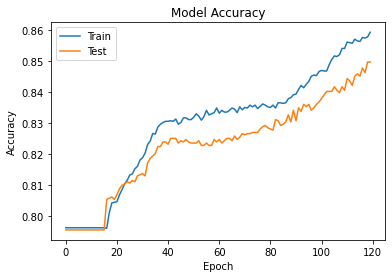

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=2, kernel_initializer='he_uniform', activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units=4, kernel_initializer='he_uniform', activation='relu'))



# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training data
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=120)

# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 636us/step


In [21]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score 
score= accuracy_score(y_pred,y_test)
print(score)

[[1518   77]
 [ 206  199]]
0.8585
